In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

In [4]:
def random_initialize_clusters(pts, k):
    return pts[np.random.randint(pts.shape[0], size=k)]

def euclidean_distance(centroids, pts):
    return np.linalg.norm(pts - centroids, axis=1)

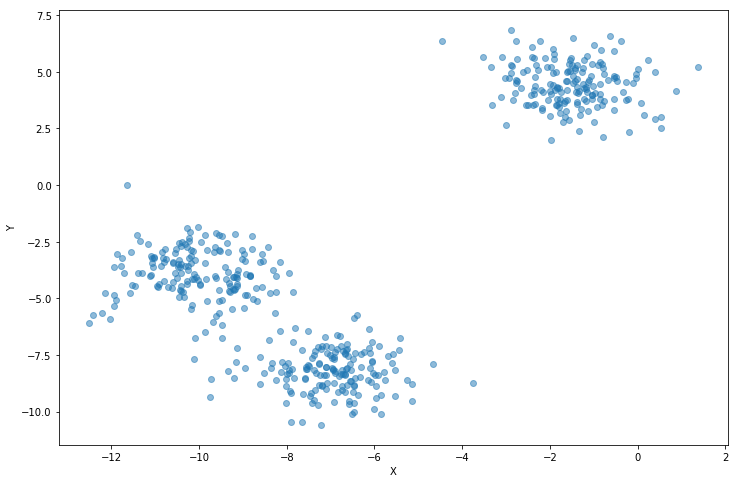

In [5]:
X, y = make_blobs(centers=3, n_samples=500, random_state=1)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], alpha=0.5)
ax.set_xlabel('X');
ax.set_ylabel('Y');

In [6]:
k = 3
maxiter = 50
centroids = random_initialize_clusters(X, k)
classes = np.zeros(X.shape[0], dtype=np.float64)
distances = np.zeros([X.shape[0], k], dtype=np.float64)

In [9]:
for it in range(maxiter):
    for i,c in enumerate(centroids):
        distances[:,i] = euclidean_distance(c, X)
    classes = np.argmin(distances, axis=1)
    for c in range(k):
        centroids[c] = np.mean(X[classes == c], 0)        

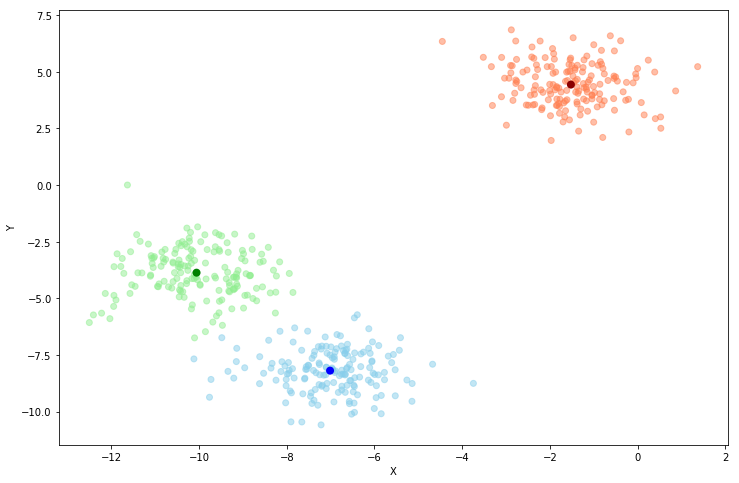

In [12]:
group_colors = ['coral', 'skyblue', 'lightgreen']
colors = [group_colors[j] for j in classes]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], color=colors, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], color=['darkred', 'blue', 'green'], marker='o',
          lw=2)
ax.set_xlabel('X');
ax.set_ylabel('Y');

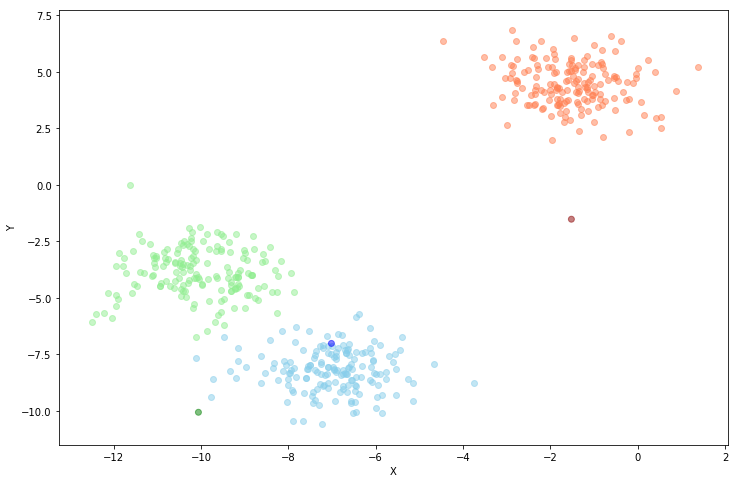

In [13]:
#Comparing my model with sklearn.KMeans

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=50, tol=1e-04, 
           random_state=1)
y_km = km.fit_predict(X)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='coral', marker='o', alpha=0.5)
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='skyblue', marker='o', alpha=0.5)
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], c='lightgreen', marker='o', alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,0], 
           c=['darkred', 'blue', 'green'], marker='o', alpha=0.5)
ax.set_xlabel('X');
ax.set_ylabel('Y');
plt.show()